In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#estrapolo i dati dal 2011 al 2017 per trovare la combinazione di portafoglio adeguata
assets=['GOOG', 'AMZN', 'APPS','FDX', 'MSFT','DIS','SHW']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a,data_source='yahoo', start ='2011-1-1' , end='2016-1-1')['Adj Close']

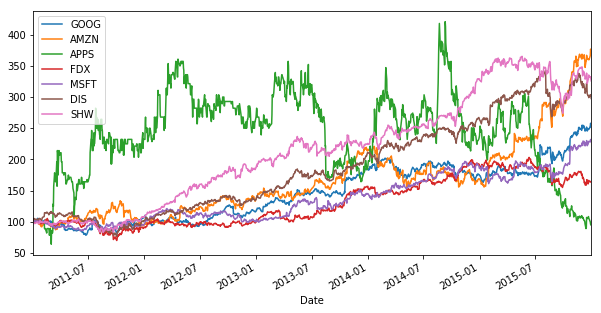

In [3]:
#normalizzo e plotto l'andamento fino al 2017 (!!!!!importante normalizzare cosi posso paragonare i risultati)
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [4]:
#calcolo ritorno logaritmico gioraliero degli assets
log_returns =np.log(pf_data/pf_data.shift(1))

In [5]:
#percentuale di ritorno annua media di ogni stocks
log_returns.mean()*250*100

GOOG    18.388596
AMZN    25.853215
APPS    -1.020152
FDX      9.901810
MSFT    16.354926
DIS     21.695813
SHW     23.491223
dtype: float64

In [6]:
#Do i pesi al tuo portafoglio di investimento fatti da te
weights_iniziali=np.array([0.166,0.179,0.103,0.156,0.110,0.186,0.100])

In [7]:
weights_iniziali

array([0.166, 0.179, 0.103, 0.156, 0.11 , 0.186, 0.1  ])

In [8]:
#ritorno atteso del tuo portafoglio negli anni indicati
rit=np.sum(weights_iniziali * log_returns.mean())*250
rit

0.1730342455526375

In [9]:
#volatilità attesa del tuo portafoglio negli anni indicati
vol=np.sqrt(np.dot(weights_iniziali.T, np.dot(log_returns.cov()*250,weights_iniziali)))
vol

0.18946846534563197

In [10]:
#genero tot combinazioni di peso per il tuo portafoglio (nel ciclo for inserisci il n combinazioni) per
#valutare tutte le possibili combinazioni di peso, scegliendo poi quella ottima
num_assets=len(assets)
pfoglio_returns=[]
pfoglio_volatilities=[]
pweights=[]
for x in range (10000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    pweights.append(weights)
   
    pfoglio_returns.append(np.sum(weights* log_returns.mean())*250)
    pfoglio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))))

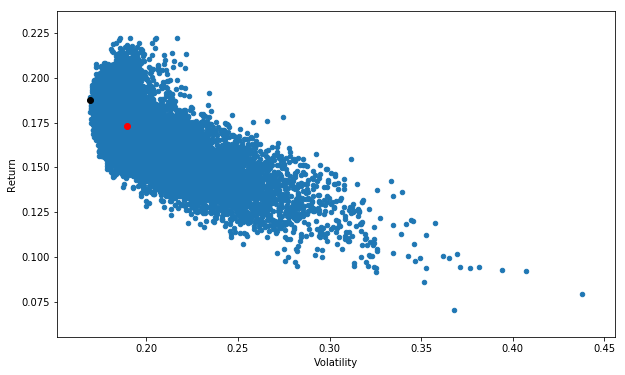

In [11]:
#plottiamo i dati delle combinazioni di portafoglio 
portfoglios=pd.DataFrame({'Return': pfoglio_returns, 'Volatility': pfoglio_volatilities})

portfoglios.plot(x='Volatility', y='Return', kind='scatter',figsize=(10,6))
#il tuo portafoglio punto rosso
plt.plot(vol,rit,'ro')
#il portafoglio con volatilità minima, ma comunque un ritorno migliore del tuo,unto nero
indice=pfoglio_volatilities.index(min(pfoglio_volatilities))
plt.plot(pfoglio_volatilities[indice],pfoglio_returns[indice],'ko')

In [12]:
#pesi delle stocks nel portafoglio
pweights[indice]

array([0.13284794, 0.00733663, 0.02251185, 0.12839993, 0.1867078 ,
       0.25531223, 0.26688362])

In [13]:
#inserisci il capitale da invesitre
capitale=100
for i in range(num_assets):
    print(assets[i] + ' = ' + str(round(pweights[indice][i]*capitale,2) ))

    

GOOG = 13.28
AMZN = 0.73
APPS = 2.25
FDX = 12.84
MSFT = 18.67
DIS = 25.53
SHW = 26.69


In [14]:
#comparo rendimenti e volatilità
print('Tuo portafoglio ------------------>' + ' Ritorno'+' = '+str(round(rit,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol,3)*100)+'%')
print('Portafoglio volatilità minima ---->' + ' Ritorno'+' = '+str(round(pfoglio_returns[indice],3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(pfoglio_volatilities[indice],3)*100)+'%')

Tuo portafoglio ------------------> Ritorno = 17.299999999999997%  Volatilità = 18.9%
Portafoglio volatilità minima ----> Ritorno = 18.7%  Volatilità = 16.900000000000002%


In [15]:
#testiamo i tuoi portafoglio dal 2017 in poi (fingo che ci troviamo nel 2017, costruisco i portafogli con i dati fino al 2017)
#dal 2017 ad oggi lo considero futuro.
#vediamo cosa succede

In [16]:
#estrapolo i dati dal 2017 in poi 
assets=['GOOG', 'AMZN', 'APPS','FDX', 'MSFT','DIS','SHW']
pf_data2 = pd.DataFrame()

for a in assets:
    pf_data2[a]= wb.DataReader(a,data_source='yahoo', start ='2016-1-1')['Adj Close']

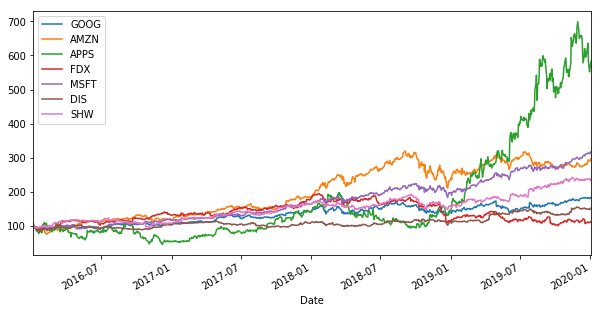

In [18]:
#normalizzo e plotto l'andamento dal 2017 a oggi
(pf_data2/pf_data2.iloc[0]*100).plot(figsize=(10,5))

In [19]:
#wooooooo che andamento apps


In [20]:
#adesso inizia il processo di calcolo dei rendimenti e volaitilà del tuo portafoglio e quello fatto per avere volatilità minima
#calcolo ritorno logaritmico gioraliero degli assets
log_returns2 =np.log(pf_data2/pf_data2.shift(1))

In [21]:
#percentuale di ritorno annua media di ogni stocks
log_returns2.mean()*250*100

GOOG    15.138069
AMZN    26.835579
APPS    43.801544
FDX      2.629155
MSFT    28.549528
DIS     10.296150
SHW     20.936352
dtype: float64

In [22]:
rit2=np.sum(weights_iniziali * log_returns2.mean())*250
vol2=np.sqrt(np.dot(weights_iniziali.T, np.dot(log_returns2.cov()*250,weights_iniziali)))
rit_pm=np.sum(pweights[indice] * log_returns2.mean())*250
vol_pm=np.sqrt(np.dot(pweights[indice].T, np.dot(log_returns2.cov()*250,pweights[indice])))
print('Tuo portafoglio ------------------>' + ' Ritorno'+' = '+str(round(rit2,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol2,3)*100)+'%')
print('Portafoglio volatilità minima ---->' + ' Ritorno'+' = '+str(round(rit_pm,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol_pm,3)*100)+'%')


Tuo portafoglio ------------------> Ritorno = 19.400000000000002%  Volatilità = 17.8%
Portafoglio volatilità minima ----> Ritorno = 17.1%  Volatilità = 15.5%
